In [75]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats



In [20]:
path1 = './CrazyEgg/HomepageV1-Interact/'
version1_interact = pd.read_csv(path1 + 'Element list Homepage Version 1 - Interact, 5-29-2013.csv')

path2 = './CrazyEgg/HomepageV2-Connect/'
version2_connect = pd.read_csv(path2 + 'Element list Homepage Version 2 - Connect, 5-29-2013.csv')

path3 = './CrazyEgg/HomepageV3-Learn/'
version3_learn = pd.read_csv(path3 + 'Element list Homepage Version 3 - Learn, 5-29-2013.csv')

path4 = './CrazyEgg/HomepageV4-Help/'
version4_help = pd.read_csv(path4 + 'Element list Homepage Version 4 - Help, 5-29-2013.csv')

path5 = './CrazyEgg/HomepageV5-Services/'
version5_services = pd.read_csv(path5 + 'Element list Homepage Version 5 - Services, 5-29-2013.csv')


In [21]:
data= []
data.append(version1_interact)
data.append(version2_connect)
data.append(version3_learn)
data.append(version4_help)
data.append(version5_services)

In [142]:
data[1].head(20)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,502,True,Homepage Version 2 - Connect • http://www....
1,66,input,s.q,357,True,created 5-29-2013 • 20 days 7 hours 34 min...
2,72,a,lib.montana.edu/find/,171,True,NaN
3,133,area,Montana State University Libraries - Home,83,False,NaN
4,103,a,Hours,74,True,NaN
5,83,a,REQUEST,57,True,NaN
6,92,a,CONNECT,53,True,NaN
7,67,button,Search,47,True,NaN
8,81,a,lib.montana.edu/request/,31,True,NaN
9,101,a,News,31,True,NaN


In [143]:
# observed results
Click = []
No_click = []

versions_name = ['INTERACT', 'CONNECT', 'LEARN', 'HELP', 'SERVICES']
v_n=0
for version in data:
    Click.append(version.loc[lambda df_ : df_['Name']== versions_name[v_n], 'No. clicks'].sum())
    No_click.append(version.loc[lambda df_ : df_['Name']!= versions_name[v_n], 'No. clicks'].sum())
    v_n+=1
observed = pd.DataFrame([Click, No_click],
                           columns = versions_name,
                           index = ["Click", "No-click"])
observed

,INTERACT,CONNECT,LEARN,HELP,SERVICES
Click,42,53,21,38,45
No-click,3672,1534,1631,1679,1303


In [111]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed)
print(chisq)
print(pvalue)
print(expected)

46.33660181942126
2.0959498129984563e-09
[[  73.77580355   31.5245558    32.81573168   34.10690757   26.7770014 ]
 [3640.22419645 1555.4754442  1619.18426832 1682.89309243 1321.2229986 ]]


In [120]:
# expected results
sum_exp_clicks = np.sum(Click)
sum_exp_no_click = np.sum(No_click)
exp_clicks = []
exp_no_click =[]
for i in range(observed.shape[1]):
    exp_clicks.append(sum_exp_clicks*(observed.iloc[1][i]/sum_exp_no_click))
    exp_no_click.append(observed.iloc[1][i])

expected = pd.DataFrame([exp_clicks, exp_no_click],
                           columns = versions_name,
                           index = ["Click", "No-click"])
expected

,INTERACT,CONNECT,LEARN,HELP,SERVICES
Click,74.419798,31.089317,33.055199,34.028007,26.407679
No-click,3672.000000,1534.000000,1631.000000,1679.000000,1303.000000


3746.4197983501376

In [109]:
alpha = 0.1

R = (observed - expected)/np.sqrt(expected)
R = R**2
chi2observed = R.values.sum()
chi2observed

47.515144581655456

In [113]:
# create a "box" with 34 clicks (1) and 2966 no-clicks (0)
sum_all_clicks =  observed.sum(axis=1)
# sum_all_clicks
box = [1] * sum_all_clicks[0]
box.extend([0]*sum_all_clicks[1])
random.shuffle(box)


Click        199
No-click    9819
dtype: int64

In [126]:
chi_scores = []

sample_no = [Click[i]+No_click[i] for i in range(5)]
# expected results
# expected = pd.DataFrame([[34/3, 34/3, 34/3], [1000 - 34/3, 1000 - 34/3, 1000 - 34/3]],
#                            columns = ["A", "B", "C"],
#                            index = ["Click", "No-click"])

for i in range(10000):
    random.shuffle(box)

    sample_clicks = [np.sum(box[0:3672]),
                 np.sum(box[3672:5206]),
                 np.sum(box[5206:6837]),
                 np.sum(box[6837:8516]),
                 np.sum(box[8516:])]

    sample_noclicks = [sample_no[i] - sample_clicks[i] for i  in range(5)]

    observed_ = pd.DataFrame([sample_clicks, sample_noclicks],
                            columns = versions_name,
                            index = ["Click", "No-click"])
    
    R_ = (observed_ - expected)/np.sqrt(expected)
    R_ = R_**2

    chi_scores.append( R_.values.sum())

In [128]:
# find out how many of our generated samples have a test statistic that is greater than the one from our observed sample
np.sum(chi_scores >= chi2observed)

0

In [129]:
# calculate the percentage represented by the generated values that are greater than the test statistic from our observed sample, compared to the entire number of samples.
# The above is long for p-value.
resampled_p_value = np.sum(chi_scores >= chi2observed) / len(chi_scores)
resampled_p_value

0.0

In [130]:
if resampled_p_value > alpha:
  print('Do not reject the Null Hypothesis.')
else:
  print('Reject the Null Hypothesis.')

Reject the Null Hypothesis.


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Percentage to Percentage
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INTERACT  1 non-null      float64
 1   CONNECT   1 non-null      float64
 2   LEARN     1 non-null      float64
 3   HELP      1 non-null      float64
 4   SERVICES  1 non-null      float64
dtypes: float64(5)
memory usage: 48.0+ bytes


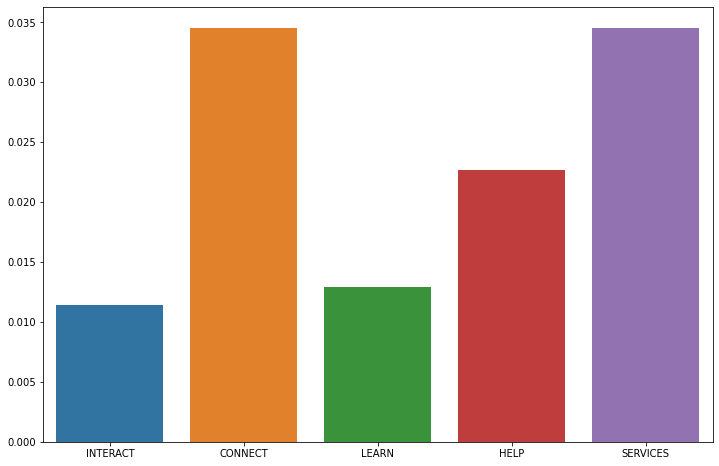

In [141]:
# observed_CTR = observed
CTR = [observed.iloc[0][i]/observed.iloc[1][i] for i in range(5)]

CTR_observed =  pd.DataFrame([CTR],
                           columns = versions_name,
                           index = ["Percentage"])
CTR_observed.info()

plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=CTR_observed
)

In [145]:
top_two_clicks = [53, 45]
top_two_no_clicks = [1534, 1303]

top_two = pd.DataFrame([top_two_clicks, top_two_no_clicks],
                           columns = ["Connect", "Services"],
                           index = ["Clicks", "No clicks"])
top_two_chisq, top_two_pvalue, top_two_df, top_two_expected = stats.chi2_contingency(top_two)

print(top_two_pvalue)
print(top_two_expected)

1.0
[[  52.99011925   45.00988075]
 [1534.00988075 1302.99011925]]
